In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import os

In [2]:
import os
os.chdir(r'C:\Users\HP\Desktop\solar-challenge-week0')
print("Current working directory:", os.getcwd())
from scripts.cleaning import clean_numeric, detect_high_missing
from scripts.eda_utils import summary_stats, missing_values_report, compute_skew_kurtosis, correlation_matrix
from scripts.visualization import plot_time_series, plot_correlation_heatmap, plot_scatter, plot_histograms, plot_bar, plot_bubble, plot_wind_rose

Current working directory: C:\Users\HP\Desktop\solar-challenge-week0


In [3]:
country = "togo" 
data_path = r"C:\Users\HP\Desktop\solar-challenge-week0\data\togo-dapaong_qc.csv"

df = pd.read_csv(data_path)
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-25 00:01:00,-1.3,0.0,0.0,0.0,0.0,24.8,94.5,0.9,1.1,0.4,227.6,1.1,977,0,0.0,24.7,24.4,NaN
1,2021-10-25 00:02:00,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.1,1.6,0.4,229.3,0.7,977,0,0.0,24.7,24.4,NaN
2,2021-10-25 00:03:00,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.2,1.4,0.3,228.5,2.9,977,0,0.0,24.7,24.4,NaN
3,2021-10-25 00:04:00,-1.2,0.0,0.0,0.0,0.0,24.8,94.3,1.2,1.6,0.3,229.1,4.6,977,0,0.0,24.7,24.4,NaN
4,2021-10-25 00:05:00,-1.2,0.0,0.0,0.0,0.0,24.8,94.0,1.3,1.6,0.4,227.5,1.6,977,0,0.0,24.7,24.4,NaN


In [4]:
# Summary statistics
print(df.describe())

# Check for missing values
missing = df.isna().sum()
print(missing[missing>0])

# Percentage of missing values
print((df.isna().sum()/len(df))*100)


                           Timestamp            GHI            DNI  \
count                         525600  525600.000000  525600.000000   
mean   2022-04-25 12:00:30.000000768     230.555040     151.258469   
min              2021-10-25 00:01:00     -12.700000       0.000000   
25%              2022-01-24 06:00:45      -2.200000       0.000000   
50%              2022-04-25 12:00:30       2.100000       0.000000   
75%              2022-07-25 18:00:15     442.400000     246.400000   
max              2022-10-25 00:00:00    1424.000000    1004.500000   
std                              NaN     322.532347     250.956962   

                 DHI           ModA           ModB           Tamb  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      116.444352     226.144375     219.568588      27.751788   
min         0.000000       0.000000       0.000000      14.900000   
25%         0.000000       0.000000       0.000000      24.200000   
50%         2.500000    

In [5]:
high_nulls = (df.isna().mean() * 100)[(df.isna().mean() * 100) > 5]
print("Columns with >5% missing values:\n", high_nulls)

# Columns to check
numeric_cols = ['GHI','DNI','DHI','ModA','ModB','WS','WSgust']

# Compute Z-scores
z_scores = np.abs(stats.zscore(df[numeric_cols]))
outliers = (z_scores > 3).any(axis=1)

print(f"Outliers detected: {outliers.sum()} rows")

Columns with >5% missing values:
 Comments    100.0
dtype: float64
Outliers detected: 9251 rows


In [6]:
# Remove outliers
df_clean = df[~outliers].copy()

# Impute missing values (median)
df_clean[numeric_cols] = df_clean[numeric_cols].fillna(df_clean[numeric_cols].median())

df_clean.to_csv(r"C:\Users\HP\Desktop\solar-challenge-week0\data\sierraleone-bumbuna_clean.csv", index=False)

c:\Users\HP\Desktop\solar-challenge-week0\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


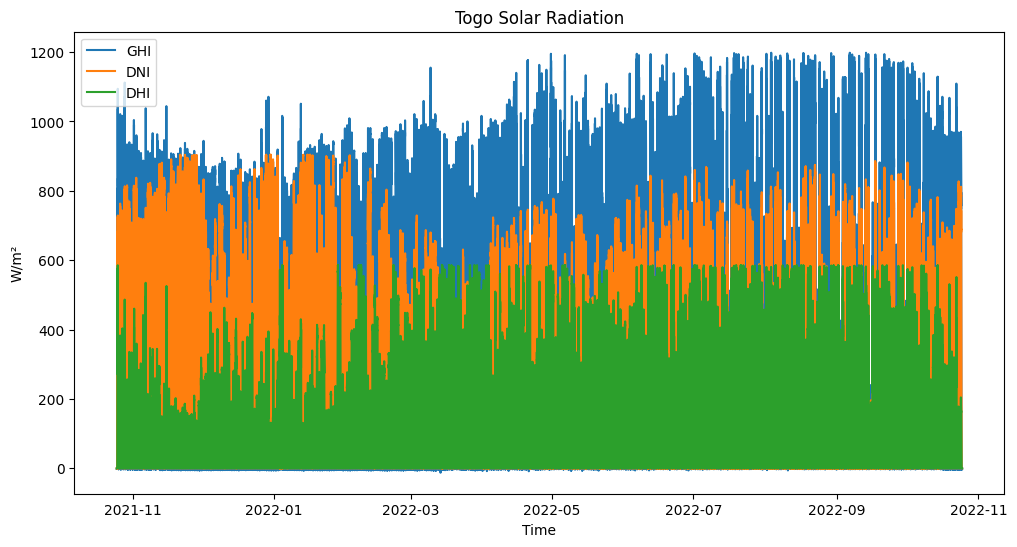

In [7]:
plt.figure(figsize=(12,6))
plt.plot(df_clean['Timestamp'], df_clean['GHI'], label='GHI')
plt.plot(df_clean['Timestamp'], df_clean['DNI'], label='DNI')
plt.plot(df_clean['Timestamp'], df_clean['DHI'], label='DHI')
plt.legend()
plt.title(f"{country.capitalize()} Solar Radiation")
plt.xlabel("Time")
plt.ylabel("W/m²")
plt.show()

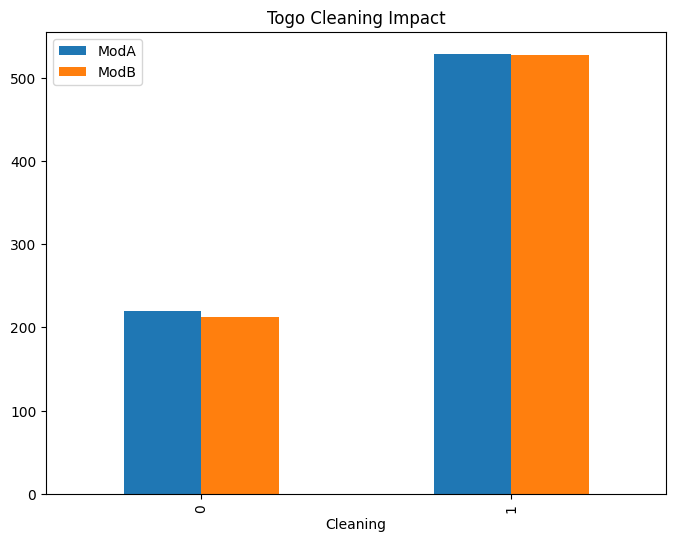

In [8]:
cleaning_effect = df_clean.groupby('Cleaning')[['ModA','ModB']].mean()
cleaning_effect.plot(kind='bar', figsize=(8,6))
plt.title(f"{country.capitalize()} Cleaning Impact")
plt.show()

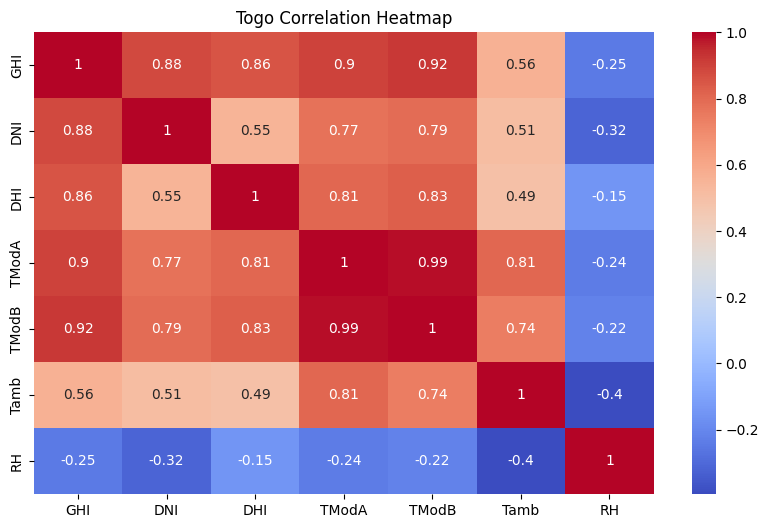

In [9]:
# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df_clean[['GHI','DNI','DHI','TModA','TModB','Tamb','RH']].corr(), annot=True, cmap='coolwarm')
plt.title(f"{country.capitalize()} Correlation Heatmap")
plt.show()

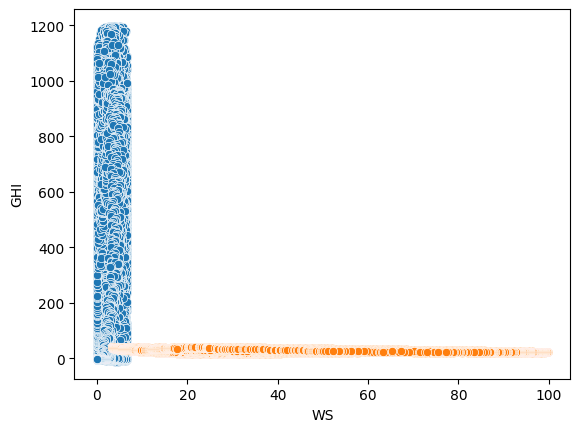

In [10]:
# Scatter plots
sns.scatterplot(data=df_clean, x='WS', y='GHI')
sns.scatterplot(data=df_clean, x='RH', y='Tamb')
plt.show()

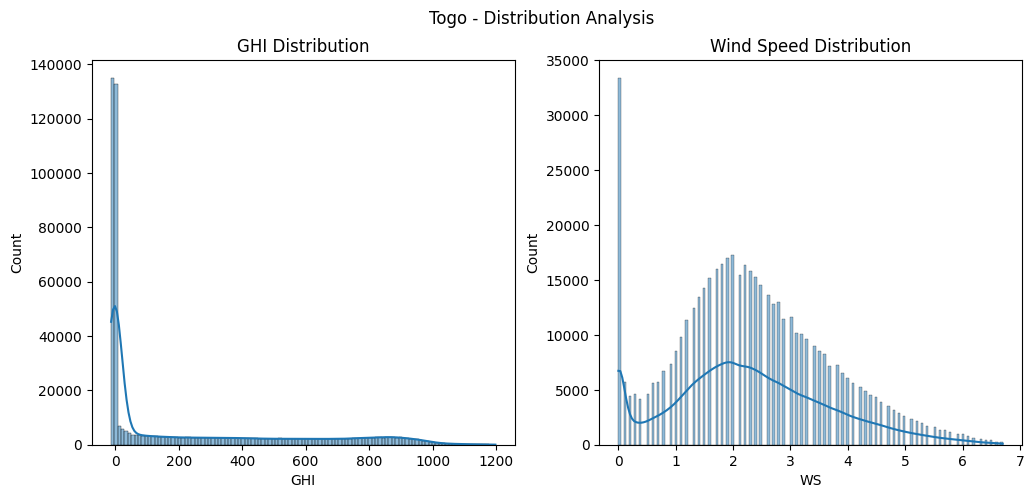

In [11]:

fig, ax = plt.subplots(1,2, figsize=(12,5))
sns.histplot(df_clean['GHI'], kde=True, ax=ax[0])
ax[0].set_title("GHI Distribution")
sns.histplot(df_clean['WS'], kde=True, ax=ax[1])
ax[1].set_title("Wind Speed Distribution")
plt.suptitle(f"{country.capitalize()} - Distribution Analysis")
plt.show()

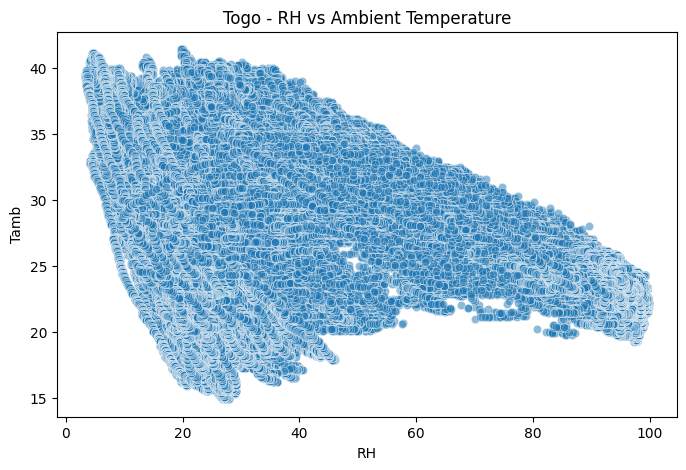

In [12]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df_clean, x='RH', y='Tamb', alpha=0.5)
plt.title(f"{country.capitalize()} - RH vs Ambient Temperature")
plt.show()

In [13]:
correlation = df_clean['RH'].corr(df_clean['Tamb'])
print(f"Correlation between RH and Tamb: {correlation:.3f}")

Correlation between RH and Tamb: -0.395


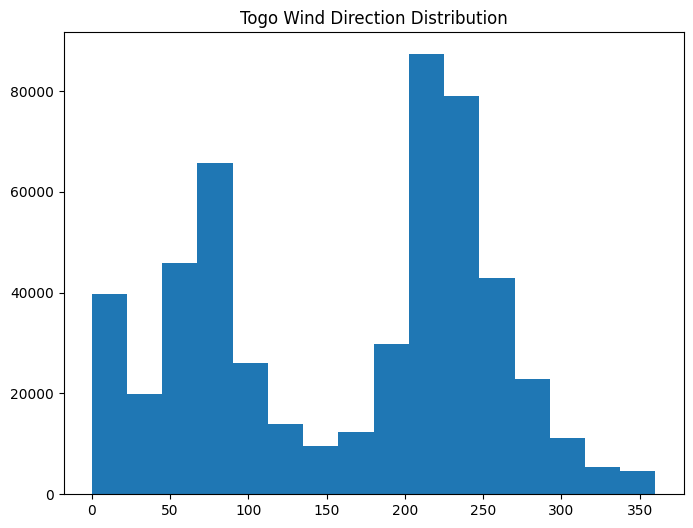

In [14]:
# Wind rose (simplified)
plt.figure(figsize=(8,6))
plt.hist(df_clean['WD'], bins=16)
plt.title(f"{country.capitalize()} Wind Direction Distribution")
plt.show()

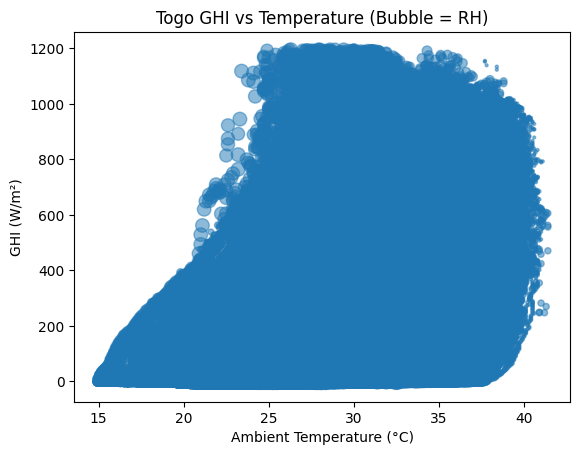

In [15]:
# Solar radiation vs. temperature
plt.scatter(df_clean['Tamb'], df_clean['GHI'], s=df_clean['RH'], alpha=0.5)
plt.xlabel("Ambient Temperature (°C)")
plt.ylabel("GHI (W/m²)")
plt.title(f"{country.capitalize()} GHI vs Temperature (Bubble = RH)")
plt.show()

In [16]:

from scipy.stats import skew, kurtosis
for col in ['GHI','DNI','DHI']:
    print(f"{col} - Skew: {skew(df_clean[col]):.2f}, Kurtosis: {kurtosis(df_clean[col]):.2f}")
plt.Figure(figsize=(8,6))

GHI - Skew: 1.14, Kurtosis: -0.13
DNI - Skew: 1.47, Kurtosis: 0.71
DHI - Skew: 1.15, Kurtosis: 0.17


<Figure size 800x600 with 0 Axes>

In [ ]:
print(f"""
🔍 {country.capitalize()} Dataset Summary:
- Total Records: {len(df)}
- Cleaned Records: {len(df_clean)}
- Missing Values Fixed: {missing.sum()}
- Outliers Removed: {outliers.sum()}
- Correlation (RH vs Tamb): {correlation:.2f}

✅ Data ready for modeling and region comparison.
""")  


🔍 Togo Dataset Summary:
- Total Records: 525600
- Cleaned Records: 516349
- Missing Values Fixed: 525600
- Outliers Removed: 9251
- Correlation (RH vs Tamb): -0.40

✅ Data ready for modeling and region comparison.



: 